## Titanic Project Using Python 

In [31]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# imputing
import missingno as msno

In [32]:
# Read csv files
train = pd.read_csv('/Users/mindu/Desktop/Data Project/Titanic Python/train.csv')
test = pd.read_csv('/Users/mindu/Desktop/Data Project/Titanic Python/test.csv')
df = pd.concat([train, test])

#take a look for the train dataset
train.info()

# Identify Data types:
# Nominal Variable: Survived, Pclass, Sex, Cabin, Embarked
# Discrete Variable: SibSp, Parch, 
# Continous Variable: Age, Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
# Missing values
(train.isna().sum()).sort_values(ascending = False)

# There exists missing values in Age, Fare, Cabin and Emarked variables. 
# There are 687 Missing values in Cabin, 177 in Age, 2 in Fare. 
# Drop Cabin since there're too many NAs to predict accuaretly

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [34]:
# Correlataions among Numeric variables and Survived
abs(train.corr()['Survived']).sort_values(ascending = False)

# No correlations among PassengerId and Survived.
# Weak Correlations: SibSp, Age, Parch -> 
# Moderate Correlations: Fare, Pclass. -> Keep these 2 variables

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

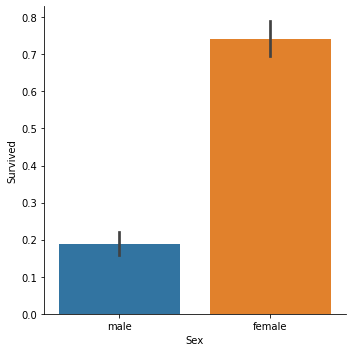

In [35]:
# Correlataions between Sex and Survived
sns.catplot(x='Sex', y='Survived', data=train, kind='bar')

#Female's survival rate is significantly greater than males. -> Keep Sex variable.

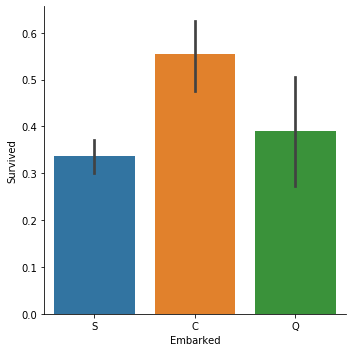

In [36]:
# Correlataions between Embarked and Survived
sns.catplot(x='Embarked', y='Survived',data=train, kind='bar')

#Emabrked C had highest survival rate, then Embarked Q -> Keep Embarked Variable

In [37]:
#Drop TicketID, Cabin variables
test = test.drop(['Ticket', 'Cabin'], axis=1)
train = train.drop(['Ticket', 'Cabin'], axis=1)

In [38]:
# Create Title variable based on Name
# Extract Titles from Name
def extract_titles(dataset):
    dataset['Name'] = dataset['Name'].astype('string')
    dataset['Title'] = dataset['Name'].copy()
    
    for i in range(len(dataset)):
        string = dataset['Name'][i]
        start = string.find(',')
        end =  string.find('.')
        dataset['Title'][i] = string[start+2: end]

extract_titles(train)
extract_titles(test)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [39]:
#Replace the rare titles
Title_list = ['Master', 'Miss', 'Mr', 'Mrs']
Rare_list = ['Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

def replace_title(dataset):
    dataset['Title'] = dataset['Title'].replace(Rare_list , 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle' , 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms' , 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme' , 'Mrs')

replace_title(train)
replace_title(test)

pd.crosstab(train['Title'],train['Sex'])


Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [40]:
# Drop Name from datasets
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

In [41]:
#Convert Sex to Numeric variable
#Map gender to Male: 0, Female: 1
def mapping_sex(dataset):
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female':1})
    
mapping_sex(train)
mapping_sex(test)

#Convert Embarked to Numeric variable
#Map 'S': 0, 'C': 1, 'Q': 2
def mapping_embarked(dataset):
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) 
    
mapping_embarked(train)
mapping_embarked(test)

#Convert Title to Numeric variable
#Map "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5
def mapping_title(dataset):
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}) 
    
mapping_title(train)
mapping_title(test)


#Create Family size variable
def family_size(dataset):
    dataset['Family_N'] =  dataset['SibSp'] +  dataset['Parch'] + 1
    
family_size(train)
family_size(test)


#Drop SibSp, Parch Variable
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_N
0,1,0,3,0,22.0,7.2500,0.0,1,2
1,2,1,1,1,38.0,71.2833,1.0,3,2
2,3,1,3,1,26.0,7.9250,0.0,2,1
3,4,1,1,1,35.0,53.1000,0.0,3,2
4,5,0,3,0,35.0,8.0500,0.0,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,0.0,5,1
887,888,1,1,1,19.0,30.0000,0.0,2,1
888,889,0,3,1,NaN,23.4500,0.0,2,4
889,890,1,1,0,26.0,30.0000,1.0,1,1


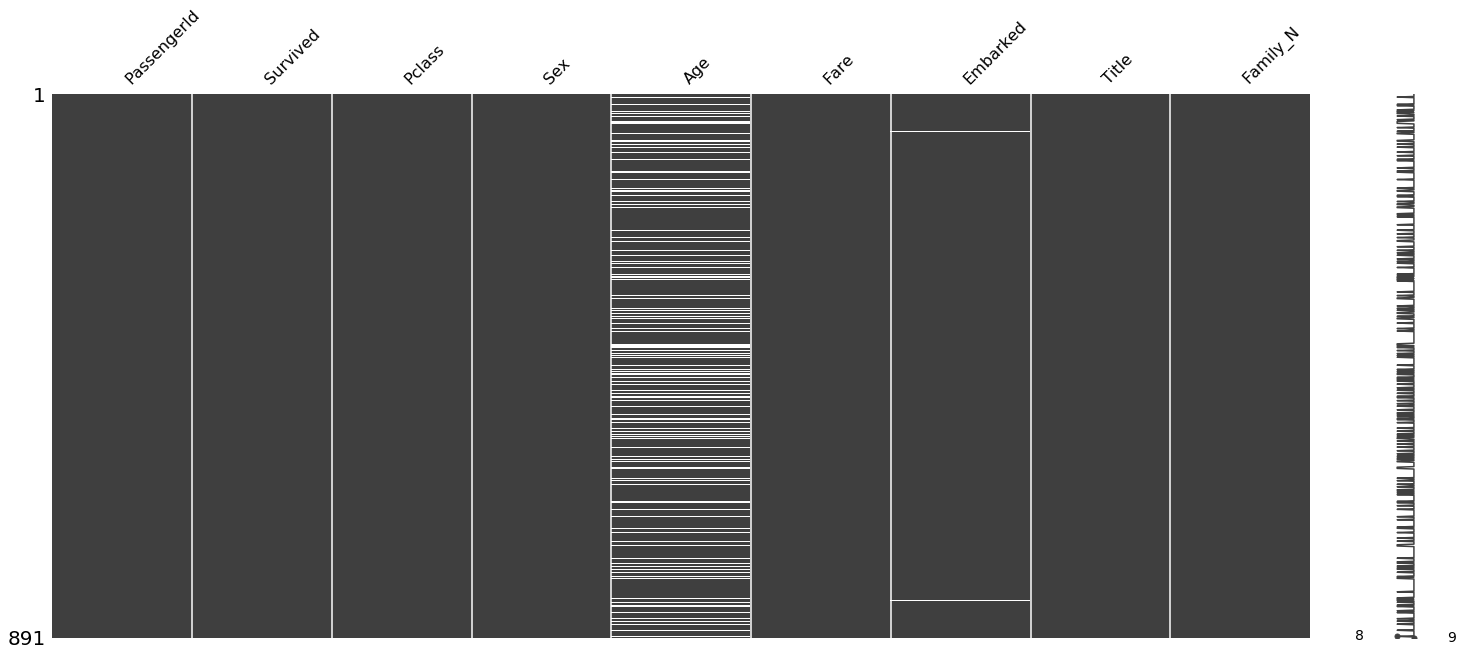

In [42]:
#Impute missing values
#Visualize missingness
msno.matrix(train)

#Missing values in Age are random

In [43]:
#Impute missing values in Age, feature engineering
#Correlations between Age and the other variables
abs(train.corr()['Age']).sort_values(ascending=False)

#Pclass and Family_N variables are correlated with Age variables

Age            1.000000
Pclass         0.369226
Family_N       0.301914
Title          0.104766
Fare           0.096067
Sex            0.093254
Survived       0.077221
PassengerId    0.036847
Embarked       0.012186
Name: Age, dtype: float64

In [44]:
#Impute missing values in Age based on Pclass, Family_N, Title
def replace_age_na(dataset):
    for i in range(len(dataset)):
        if np.isnan(dataset['Age'][i]):
            pclass = dataset['Pclass'][i]
            family_size = dataset['Family_N'][i]
            calculated_mean = dataset.loc[(dataset['Pclass']==pclass) & (dataset['Family_N']==family_size),'Age'].mean()
            dataset.at[i, "Age"] = calculated_mean
        
    for i in range(len(dataset)):
        if np.isnan(dataset['Age'][i]):
            pclass = dataset['Pclass'][i]
            title = dataset['Title'][i]
            calculated_mean = dataset.loc[(dataset['Pclass']==pclass) & (dataset['Title']==title),'Age'].mean()
            dataset.at[i, "Age"] = calculated_mean
        
replace_age_na(train)
replace_age_na(test)

In [45]:
#Impute missing values in Embarked and Fare
#Replace missing values in Embarked and Fare with median
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].median())
test['Embarked'] = train['Embarked'].fillna(train['Embarked'].median())

#Replace missing values in Fare with median
test['Fare'] = train['Fare'].fillna(train['Fare'].mean())

train['Embarked'] = train['Embarked'].astype('int64')

#No Missing values now!
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Family_N       0
dtype: int64

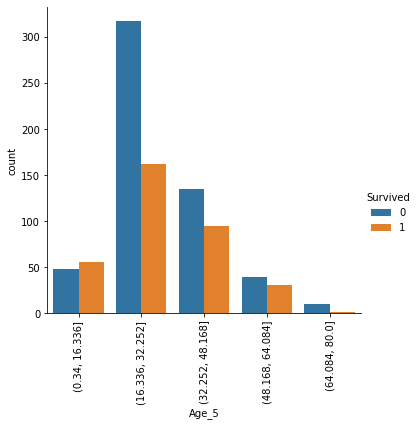

In [46]:
#Create age bands
train['Age_5'] = pd.cut(train['Age'],5)
sns.catplot(x="Age_5", data=train, kind="count",hue='Survived')
plt.xticks(rotation=90)

#Repeat same steps for test dataset
test['Age_5'] = pd.cut(test['Age'],5)

ranges = [0,16,32,48,64,100]
group_names = [0,1,2,3,4]
train['Age_band'] = pd.cut(train['Age'], bins = ranges, labels = group_names)
test['Age_band'] = pd.cut(test['Age'], bins = ranges, labels = group_names)

# Drop age columns
train = train.drop(['Age', 'Age_5'], axis=1)
test = test.drop(['Age', 'Age_5'], axis=1)

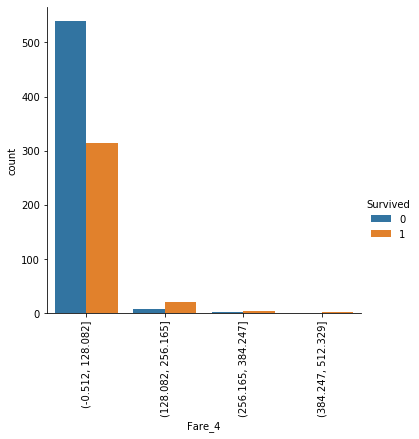

In [47]:
# Create Fare Bands
train['Fare_4'] = pd.cut(train['Fare'],4)
sns.catplot(x='Fare_4', data=train, kind='count', hue='Survived')
plt.xticks(rotation=90)

#Repeat same steps for test dataset
test['Fare_4'] = pd.cut(test['Fare'],4)

fare_ranges = [np.NINF,128,256,384,np.inf]
fare_group_names = [0,1,2,3]
train['Fare_band'] = pd.cut(train['Fare'], bins = fare_ranges, labels = fare_group_names)
test['Fare_band'] = pd.cut(test['Fare'], bins = fare_ranges, labels = fare_group_names)

# Drop Fare, Fare_4 columns, passengerID column for train dataset
train = train.drop(['Fare', 'Fare_4', 'PassengerId'], axis=1)
test = test.drop(['Fare', 'Fare_4'], axis=1)

In [48]:
#Model and predict
X_Train = train.drop(['Survived'], axis=1)
Y_Train = train['Survived']
X_Test = test.drop(['PassengerId'], axis=1)

In [49]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_Train, Y_Train)
Y_Pred = log_reg.predict(X_Test)
acc_log = round(log_reg.score(X_Train, Y_Train)*100,2)
acc_log

#Get importance ranking
importance = log_reg.coef_[0]
coeff_df = pd.DataFrame((X_Train).columns)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(importance)
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.224219
3,Title,0.499786
6,Fare_band,0.223504
2,Embarked,0.211976
4,Family_N,-0.287438
5,Age_band,-0.639943
0,Pclass,-1.152752


In [50]:
#SVN
svc = SVC()
svc.fit(X_Train, Y_Train)
Y_pred = svc.predict(X_Test)
acc_svc = round(svc.score(X_Train, Y_Train) * 100, 2)
acc_svc

83.28

In [51]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_Train, Y_Train)
Y_pred = knn.predict(X_Test)
acc_knn = round(knn.score(X_Train, Y_Train) * 100, 2)
acc_knn

83.05

In [52]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_Train, Y_Train)
Y_pred = gaussian.predict(X_Test)
acc_gaussian = round(gaussian.score(X_Train, Y_Train) * 100, 2)
acc_gaussian

80.36

In [53]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_Train, Y_Train)
Y_pred = perceptron.predict(X_Test)
acc_perceptron = round(perceptron.score(X_Train, Y_Train) * 100, 2)
acc_perceptron

72.84

In [54]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_Train, Y_Train)
Y_pred = linear_svc.predict(X_Test)
acc_linear_svc = round(linear_svc.score(X_Train, Y_Train) * 100, 2)
acc_linear_svc

/Users/mindu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.14

In [55]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)
Y_pred = sgd.predict(X_Test)
acc_sgd = round(sgd.score(X_Train, Y_Train) * 100, 2)
acc_sgd

82.04

In [56]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_Train, Y_Train)
Y_pred = decision_tree.predict(X_Test)
acc_decision_tree = round(decision_tree.score(X_Train, Y_Train) * 100, 2)
acc_decision_tree

86.76

In [57]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_Train, Y_Train)
Y_pred = random_forest.predict(X_Test)
random_forest.score(X_Train, Y_Train)
acc_random_forest = round(random_forest.score(X_Train, Y_Train) * 100, 2)
acc_random_forest

86.76

In [58]:
models = pd.DataFrame({'Models' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
                      'Scores' : [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Scores', ascending=False)

,Models,Scores
3,Random Forest,86.76
8,Decision Tree,86.76
0,Support Vector Machines,83.28
1,KNN,83.05
6,Stochastic Gradient Decent,82.04
2,Logistic Regression,81.71
7,Linear SVC,81.14
4,Naive Bayes,80.36
5,Perceptron,72.84


In [59]:
# submission = pd.DataFrame({
# 'PassengerId': test['PassengerId'],
#     'Survived': Y_pred
# })

# submission.to_csv('/Users/mindu/Desktop/Data Project/Titanic Python/submission.csv', index=False)